In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

DATA_IN_PATH='./data_in/'

file_list=['labeledTrainData.tsv.zip', 'unlabeledTrainData.tsv.zip', 'testData.tsv.zip']

train_data=pd.read_csv(DATA_IN_PATH+"labeledTrainData.tsv", header=0, delimiter="\t", quoting=3)

In [4]:
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [5]:
print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
    if 'tsv' in file and 'zip' not in file:
        print(file.ljust(30)+str(round(os.path.getsize(DATA_IN_PATH+file)/1000000,2))+'MB')

파일 크기 : 
labeledTrainData.tsv          33.56MB
testData.tsv                  32.72MB
unlabeledTrainData.tsv        67.28MB


In [6]:
print('전체 학습 데이터의 개수: {}'.format(len(train_data)))

전체 학습 데이터의 개수: 25000


In [7]:
train_length=train_data['review'].apply(len)
train_length.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

Text(0, 0.5, 'Number of review')

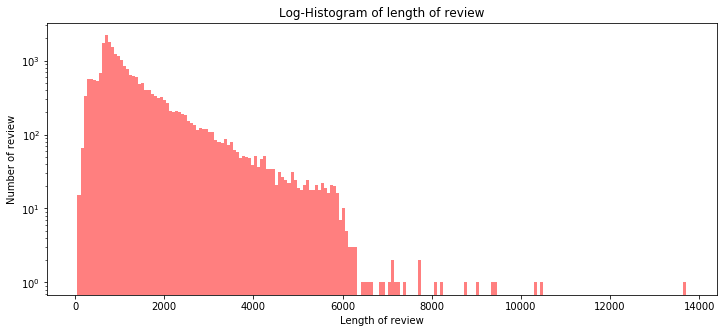

In [8]:
# 그래프에 대한 이미지 크기 선언
# figsize:(가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12,5))
# 히스토그램 선언
# bins : 히스토그램 값에 대한 버킷 범위
# range : x축 값의 범위
# alpha : 그래프 색상 투명도
# color : 그래프 색상
# label : 그래프에 대한 라벨
plt.hist(train_length, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Log-Histogram of length of review')
# 그래프 x 축 라벨
plt.xlabel('Length of review')
# 그래프 y 축 라벨
plt.ylabel('Number of review')

In [10]:
print('리뷰 길이 최댓값: {}'.format(np.max(train_length)))
print('리뷰 길이 최솟값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간값: {}'.format(np.median(train_length)))
# 사분위의 대한 경우는 0~100 스케일로 돼 있음
print('리뷰 길이 제1사분위: {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제3사분위: {}'.format(np.percentile(train_length, 75)))

리뷰 길이 최댓값: 13710
리뷰 길이 최솟값: 54
리뷰 길이 평균값: 1329.71
리뷰 길이 표준편차: 1005.22
리뷰 길이 중간값: 983.0
리뷰 길이 제1사분위: 705.0
리뷰 길이 제3사분위: 1619.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1b0838652c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1b0838d9108>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b08391b2c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1b0838f0448>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b0ffe59fc8>],
 'means': [<matplotlib.lines.Line2D at 0x1b0d3f07dc8>]}

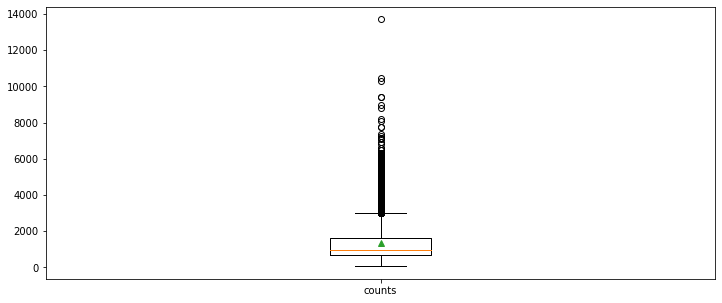

In [11]:
plt.figure(figsize=(12, 5))
# 박스 플롯 생성
# 첫 번째 인자 : 여러 분포에 대한 데이터 리스트를 입력
# labels : 입력한 데이터에 대한 라벨
# showmeans : 평균값을 마크함

plt.boxplot(train_length, labels=['counts'], showmeans=True)

(-0.5, 799.5, 599.5, -0.5)

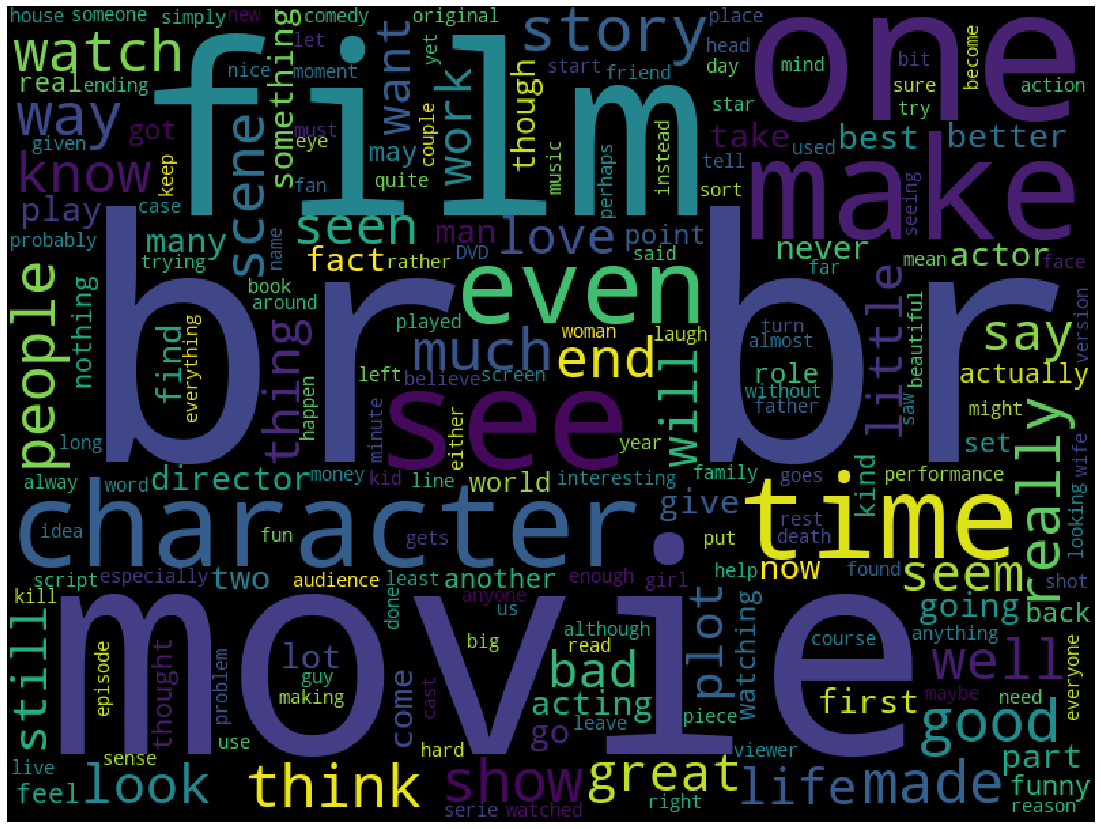

In [12]:
from wordcloud import WordCloud
cloud=WordCloud(width=800, height=600).generate(" ".join(train_data['review']))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

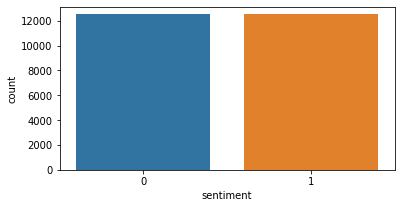

In [13]:
fig, axe=plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(train_data['sentiment'])

In [14]:
print("긍정 리뷰 개수: {}".format(train_data['sentiment'].value_counts()[1]))
print("부정 리뷰 개수: {}".format(train_data['sentiment'].value_counts()[0]))

긍정 리뷰 개수: 12500
부정 리뷰 개수: 12500


Text(0, 0.5, 'Number of reviews')

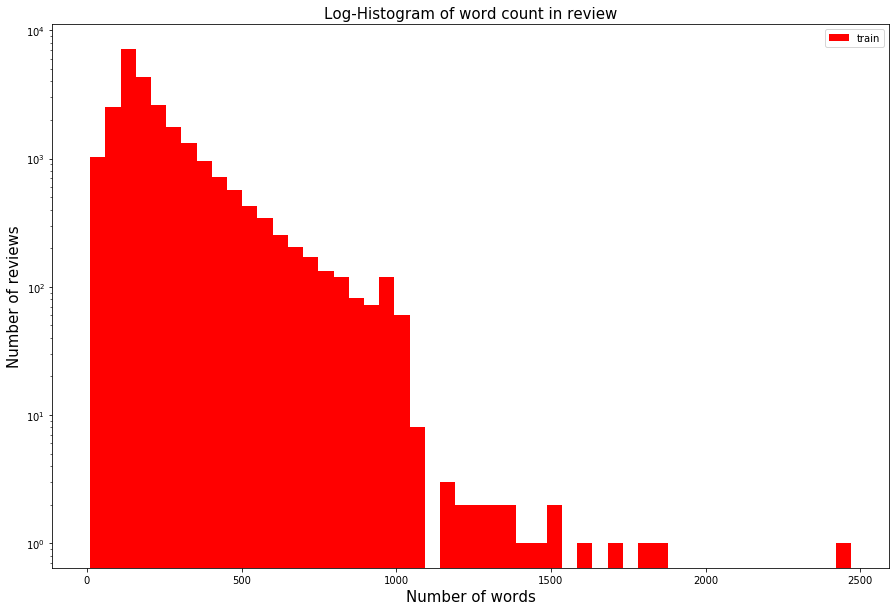

In [15]:
# 각 단어의 길이를 가지는 변수
train_word_counts=train_data['review'].apply(lambda x:len(x.split(' ')))

plt.figure(figsize=(15,10))
plt.hist(train_word_counts, bins=50, facecolor='r', label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

In [17]:
print('리뷰 길이 최댓값: {}'.format(np.max(train_word_counts)))
print('리뷰 길이 최솟값: {}'.format(np.min(train_word_counts)))
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(train_word_counts)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('리뷰 길이 중간값: {}'.format(np.median(train_word_counts)))
# 사분위의 대한 경우는 0~100 스케일로 돼 있음
print('리뷰 길이 제1사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 길이 제3사분위: {}'.format(np.percentile(train_word_counts, 75)))

리뷰 길이 최댓값: 2470
리뷰 길이 최솟값: 10
리뷰 길이 평균값: 233.79
리뷰 길이 표준편차: 173.74
리뷰 길이 중간값: 174.0
리뷰 길이 제1사분위: 127.0
리뷰 길이 제3사분위: 284.0


In [18]:
# 물음표가 구두점으로 쓰임
qmarks=np.mean(train_data['review'].apply(lambda x: '?' in x))
# 마침표가 구두점으로 쓰임
fullstop=np.mean(train_data['review'].apply(lambda x: '.' in x))
# 첫 번째 대문자
capital_first=np.mean(train_data['review'].apply(lambda x:x[0].isupper()))
# 대문자 개수
capitals=np.mean(train_data['review'].apply(lambda x:max([y.isupper() for y in x])))
# 숫자 개수
numbers=np.mean(train_data['review'].apply(lambda x:max([y.isdigit() for y in x])))

print('물음표가 있는 질문: {:.2f}%'.format(qmarks*100))
print('마침표가 있는 질문: {:.2f}%'.format(fullstop*100))
print('첫 글자가 대문자인 질문: {:.2f}%'.format(capital_first*100))
print('대문자가 있는 질문: {:.2f}%'.format(capitals*100))
print('숫자가 있는 질문: {:.2f}%'.format(numbers*100))

물음표가 있는 질문: 29.55%
마침표가 있는 질문: 99.69%
첫 글자가 대문자인 질문: 0.00%
대문자가 있는 질문: 99.59%
숫자가 있는 질문: 56.66%
